In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols

In [60]:
df=pd.read_csv("다 붙임.csv", encoding="utf-8-sig")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df1=df.copy()
df1

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,9,10,11,12,금,목,수,토,화,배출량
0,849,4324,2.27,1.08,219,24,41,55,50,0,...,0,0,0,0,0,0,0,0,0,1708250
1,1394,8345,2.29,1.05,5689,3846,438,482,101,468,...,0,0,0,0,0,0,0,0,0,1239600
2,5028,20455,2.61,0.97,671,159,211,139,311,36,...,0,0,0,0,0,0,0,0,0,9357900
3,964,5586,2.41,1.03,1973,400,202,153,272,20,...,0,0,0,0,0,0,0,0,0,1717700
4,2016,9701,2.17,0.97,5382,1680,546,600,430,597,...,0,0,0,0,0,0,0,0,0,1264950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,1286,1945,1.73,0.92,425,15,115,279,27,1,...,0,0,0,0,0,0,1,0,0,1441350
47245,728,1955,1.77,1.02,518,28,126,132,33,0,...,0,0,0,0,0,0,1,0,0,1070950
47246,1381,6168,2.00,1.05,3848,1325,472,492,90,467,...,0,0,0,0,0,0,1,0,0,1377450
47247,1947,9689,2.51,0.99,308,132,127,65,143,6,...,0,0,0,0,0,0,1,0,0,3749600


In [61]:
행정동명1=["건입동", "남원읍", "노형동", "대륜동", "대정읍", "대천동", "도두동", "동홍동", 
      "봉개동", "삼도1동", "삼도2동", "삼양동", "서홍동", "성산읍", "송산동", "아라동", "안덕면",
      "애월읍", "연동", "영천동", "예래동", "오라동", "외도동", "용담1동", "용담2동", 
      "이도1동", "이도2동", "이호동", "일도1동", "일도2동", "정방동", "중문동", "중앙동", 
      "천지동", "표선면", "화북동", "효돈동"]

행정동명2=["구좌읍", '조천읍', "한경면", "한림읍"]

In [62]:
df2=pd.read_csv("../전처리/최종 전처리완료.csv", encoding="utf-8-sig")
df3=df2.copy()

행1_df=pd.DataFrame([[0]*len(df3.iloc[0, :])], columns=list(df3.columns))
행1_df.drop([0], inplace=True)

for 행정동 in 행정동명1:
    dfdf=df3[df3["행정동명"]==행정동]
    행1_df=pd.concat([행1_df, dfdf])
    
행1_df=행1_df.reset_index()
행1_df.drop(['index'], axis=1, inplace=True)

행1_df=행1_df.sort_values(['일자', '행정동명'])
행1_df

,일자,년,월,행정시,행정동명,사업체수,세대수,세대당 인구,남여 비율,단독주택,...,요일별배출건수비율,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율,분기
0,2018-01-01,2018,1,제주시,건입동,849,4324,2.27,1.08,219,...,0.144354,0.145655,0.146692,0.146655,0.147234,0.150515,0.075550,0.086198,0.086115,1
1277,2018-01-01,2018,1,서귀포시,남원읍,1394,8345,2.29,1.05,5689,...,0.148100,0.146502,0.146496,0.146110,0.142898,0.142886,0.073769,0.084479,0.084518,1
2554,2018-01-01,2018,1,제주시,노형동,5028,20455,2.61,0.97,671,...,0.148014,0.150125,0.150167,0.150055,0.151874,0.151887,0.072701,0.082493,0.082460,1
3831,2018-01-01,2018,1,서귀포시,대륜동,964,5586,2.41,1.03,1973,...,0.147198,0.148896,0.145855,0.149547,0.151538,0.151840,0.082233,0.091919,0.089536,1
5108,2018-01-01,2018,1,서귀포시,대정읍,2016,9701,2.17,0.97,5382,...,0.148043,0.146337,0.146357,0.150654,0.148876,0.148874,0.063644,0.073351,0.073457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42140,2021-06-30,2021,6,서귀포시,중앙동,1286,1945,1.73,0.92,425,...,0.137895,0.140887,0.140861,0.149856,0.149231,0.149228,0.079346,0.073485,0.073400,2
43417,2021-06-30,2021,6,서귀포시,천지동,728,1955,1.77,1.02,518,...,0.143098,0.143161,0.143136,0.152850,0.151439,0.151436,0.089868,0.088342,0.088462,2
44694,2021-06-30,2021,6,서귀포시,표선면,1381,6168,2.00,1.05,3848,...,0.142349,0.141396,0.171710,0.151235,0.148343,0.148329,0.092914,0.096342,0.154710,2
45971,2021-06-30,2021,6,제주시,화북동,1947,9689,2.51,0.99,308,...,0.141778,0.139756,0.139752,0.149539,0.145575,0.145555,0.088311,0.084980,0.084936,2


In [63]:
df1=pd.concat([df1, 행1_df[['행정동명', '년', '일자']]], axis=1)
df1

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,12,금,목,수,토,화,배출량,행정동명,년,일자
0,849,4324,2.27,1.08,219,24,41,55,50,0,...,0,0,0,0,0,0,1708250,건입동,2018,2018-01-01
1,1394,8345,2.29,1.05,5689,3846,438,482,101,468,...,0,0,0,0,0,0,1239600,건입동,2018,2018-01-02
2,5028,20455,2.61,0.97,671,159,211,139,311,36,...,0,0,0,0,0,0,9357900,건입동,2018,2018-01-03
3,964,5586,2.41,1.03,1973,400,202,153,272,20,...,0,0,0,0,0,0,1717700,건입동,2018,2018-01-04
4,2016,9701,2.17,0.97,5382,1680,546,600,430,597,...,0,0,0,0,0,0,1264950,건입동,2018,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,1286,1945,1.73,0.92,425,15,115,279,27,1,...,0,0,0,1,0,0,1441350,효돈동,2021,2021-06-26
47245,728,1955,1.77,1.02,518,28,126,132,33,0,...,0,0,0,1,0,0,1070950,효돈동,2021,2021-06-27
47246,1381,6168,2.00,1.05,3848,1325,472,492,90,467,...,0,0,0,1,0,0,1377450,효돈동,2021,2021-06-28
47247,1947,9689,2.51,0.99,308,132,127,65,143,6,...,0,0,0,1,0,0,3749600,효돈동,2021,2021-06-29


In [80]:
df1_1=df1[df1['행정동명']=="건입동"]
df1_1.sort_values(['일자'], inplace=True)

print(list(df1_1.columns))

['사업체수', '세대수', '세대당 인구', '남여 비율', '단독주택', '창고시설', '제2종근린생활시설', '제1종근린생활시설', '공동주택', '동.식물관련시설', '숙박시설', '교육연구시설', '관광휴게시설', '분뇨.쓰레기처리시설', '건설이후(일)', '건설이후(일)_std', '초등학교수', '중학교수', '고등학교수', '거주편차', '일편차', '방문편차', '거주표준편차', '일표준편차', '방문표준편차', '장기1거주편차', '장기1거주표준편차', '장기1일편차', '장기1일표준편차', '장기1방문편차', '장기1방문표준편차', '장기2거주편차', '장기2거주표준편차', '장기2일편차', '장기2일표준편차', '장기2방문편차', '장기2방문표준편차', '장기3거주편차', '장기3거주표준편차', '장기3일편차', '장기3일표준편차', '장기3방문편차', '장기3방문표준편차', '장기4거주편차', '장기4거주표준편차', '장기4일편차', '장기4일표준편차', '장기4방문편차', '장기4방문표준편차', '단기1방문편차', '단기1방문표준편차', '단기2방문편차', '단기2방문표준편차', '단기3방문편차', '단기3방문표준편차', '단기4방문편차', '단기4방문표준편차', 'CPI', '고용률', '실업률', '지방세', '재산세', '지방소득세', '내국인_행태별 0 개별여행', '내국인_행태별 0 부분패키지', '내국인_행태별 0 패키지', '내국인_목적별 0 레저스포츠', '내국인_목적별 0 회의및업무', '내국인_목적별 0 휴양및관람', '내국인_목적별 0 친지방문', '내국인_목적별 0 교육여행', '내국인_목적별 0 기타방문', '내국인_합계', '면적', '외국인_합계', '총인구수_계', '남자인구수_계', '여자인구수_계', '총인구수_0 0 14세', '총인구수_15 0 64세', '총인구수_65 0 100+', '남자인구수_0 0 14세', '남자인구수_15 0 64세', '남자인구수_65 0 100+', '여자인구수_0 

<ipython-input-80-7a963023fdb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1.sort_values(['일자'], inplace=True)


In [87]:
df1_1

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,12,금,목,수,토,화,배출량,행정동명,년,일자
0,849,4324,2.27,1.08,219,24,41,55,50,0,...,0,0,0,0,0,0,1708250,건입동,2018,2018-01-01
1,1394,8345,2.29,1.05,5689,3846,438,482,101,468,...,0,0,0,0,0,0,1239600,건입동,2018,2018-01-02
2,5028,20455,2.61,0.97,671,159,211,139,311,36,...,0,0,0,0,0,0,9357900,건입동,2018,2018-01-03
3,964,5586,2.41,1.03,1973,400,202,153,272,20,...,0,0,0,0,0,0,1717700,건입동,2018,2018-01-04
4,2016,9701,2.17,0.97,5382,1680,546,600,430,597,...,0,0,0,0,0,0,1264950,건입동,2018,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,420,2065,2.16,1.11,882,136,108,107,49,6,...,0,0,0,0,0,0,631400,건입동,2021,2021-06-26
1273,2369,12267,2.53,0.99,660,245,184,92,254,37,...,0,0,0,0,0,0,3472150,건입동,2021,2021-06-27
1274,1227,5802,1.99,1.08,4272,1100,484,438,141,320,...,0,0,0,0,0,0,213500,건입동,2021,2021-06-28
1275,3083,14881,2.31,1.07,4440,1081,407,287,120,372,...,0,0,0,0,0,0,189650,건입동,2021,2021-06-29


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Pyt

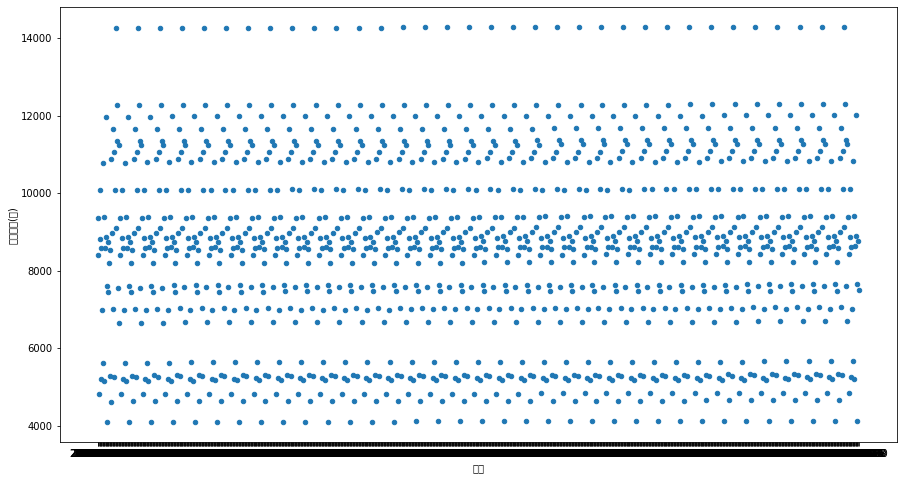

In [88]:
df1_1.plot(kind='scatter', x='일자', y='건설이후(일)', figsize=(15, 8)) ## 선그래프 생성
 
#plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.show()

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Pyt

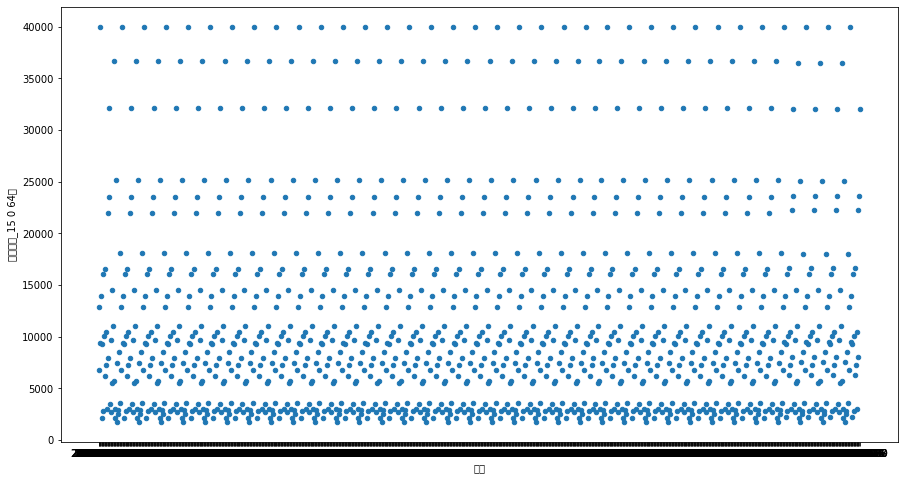

In [89]:
df1_1.plot(kind='scatter',x='일자', y='총인구수_15 0 64세', figsize=(15, 8)) ## 선그래프 생성
 
#plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.show()

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)


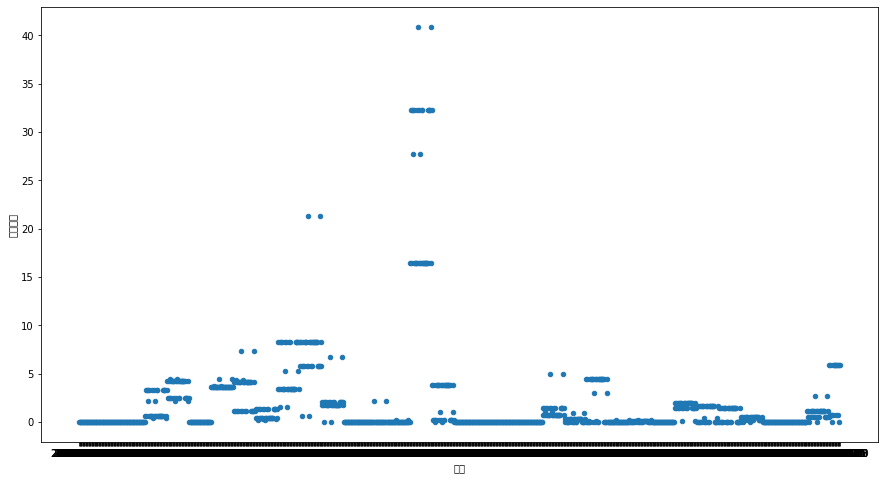

In [90]:
df1_1.plot(kind='scatter',x='일자', y='일강수량', figsize=(15, 8)) ## 선그래프 생성
 
#plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.show()